<b><font size=5><center>Исследование объявлений о продаже квартир</center></font></b>

### Суть проекта

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание проекта

Мы проанализировали данные из объявлений о продаже кварир в Санкт-Петербурге и Ленинградской области. Для начала мы изучили данные на аномалии, пропуски, провели предобработку данных, поработали над типами данных и добавили еще несколько нужных столбцов. Затем мы проанализировали некоторые наиболее важные столбцы на распределение данных и избавились от выбросов, которые могли исказить итог. Мы выявили взаимосвязи между ценой и некоторыми показателями. А также проанализировали отдельно данные в центре Санкт-Петербурга и сравнили с общей картиной.

### Изучение данных из файла

In [1]:
import pandas as pd               #импорт библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\mi\Downloads\real_estate_data.csv', sep='\t') #извлечение данных

display(data.info())
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Изучим отдельные столбцы на пропуски и аномалии, и логически обработаем их. Первый столбец, в котором были выявлены пропуски - высота потолков. При выводе количества уникальных значений в столбце была обнаружена квартира с потолками в 100 метров. Многовато. Надо проверить - есть ли еще подобные выдающиеся значения. 

In [3]:
print('Количество пропусков в столбце -', data['ceiling_height'].isna().sum())
print(data['ceiling_height'].value_counts())

Количество пропусков в столбце - 9195
2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64


Отсеем значения стобца больше 10 (теоретическая максимально возможная высота потолков в квартире). Заодно проверим значения высоты потолков меньше 2 метров (мало ли). 
Действительно, таких значений оказалось много. И окинув взглядом, можно предположить, что данная путаница возникла из-за неправильной расстановки запятых. Обратим внимание на значения высоты 1.20, 1.75, 14.0 и 10.3. Предположим, что минимальные и максимальное значение высоты потолков 2 метра и 10 метров. Куда бы мы не перенесли запятую в этих значених, они выходят из ряда вон. Тогда в значении больше 20 перенесем запятую на один знак влево. В значении высоты потолка 1 метр та же ситуация - перенесем запятую на одно значение вправо. Остальные "из ряда вон" строки наверняка логически обработать не получится - проcто безболезненно их удалим.

In [4]:
display(data.query('ceiling_height < 2'))
data.loc[data['ceiling_height'] == 1.00, 'ceiling_height'] *=10
display(data.query('ceiling_height > 10'))
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10
data = data.loc[data['ceiling_height'] > 2].reset_index(drop=True)
data = data.loc[data['ceiling_height'] < 10].reset_index(drop=True)
#Проверка
print(data['ceiling_height'].value_counts())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN


2.50    3522
2.60    1647
2.70    1582
3.00    1112
2.80     993
        ... 
3.84       1
3.43       1
4.30       1
3.39       1
3.59       1
Name: ceiling_height, Length: 169, dtype: int64


Теперь можно почистить пропуски. Судя по матрице корелляции, между высотой потолков и другими параметрами в таблице нет сильной взаимосвязи, чтобы можно было экстраполировать данные на пропуски. Поэтому просто заменим пропуски медианным значением по столбцу.

In [5]:
display(data.corr())
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
#Проверка
print('Количество пропусков в столбце -', data['ceiling_height'].isna().sum())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.117708,0.111385,0.089234,0.044077,0.029300,0.095931,0.043615,-0.029487,-0.018239,0.117611,0.108031,-0.000900,-0.045336,0.018020,0.005513,-0.011603,0.000209,-0.036809
last_price,0.117708,1.000000,0.713045,0.401564,0.379410,0.003425,0.615495,0.037727,-0.025243,0.004607,0.535928,0.014136,-0.027633,-0.227163,0.181628,-0.024303,0.174769,-0.121871,0.094298
total_area,0.111385,0.713045,1.000000,0.760895,0.458354,-0.058044,0.942677,-0.007054,-0.065306,-0.000118,0.612443,0.046450,-0.029770,-0.239617,0.186421,-0.030230,0.160692,-0.127968,0.159605
rooms,0.089234,0.401564,0.760895,1.000000,0.280672,-0.209097,0.846737,-0.136763,-0.137862,-0.037234,0.282744,0.035423,-0.058008,-0.189632,0.144640,-0.046245,0.094295,-0.087050,0.143799
ceiling_height,0.044077,0.379410,0.458354,0.280672,1.000000,-0.090379,0.436287,-0.045818,0.017956,0.010954,0.401283,-0.079128,-0.102306,-0.350059,0.259928,-0.055376,0.226061,-0.137030,0.125047
floors_total,0.029300,0.003425,-0.058044,-0.209097,-0.090379,1.000000,-0.151414,0.675139,0.057416,0.022660,0.168558,0.191887,0.113744,0.008387,-0.233031,0.090050,-0.129744,0.062166,-0.056324
living_area,0.095931,0.615495,0.942677,0.846737,0.436287,-0.151414,1.000000,-0.080678,-0.050412,-0.011989,0.439161,0.017384,-0.053809,-0.238603,0.195833,-0.050035,0.145603,-0.111567,0.150363
floor,0.043615,0.037727,-0.007054,-0.136763,-0.045818,0.675139,-0.080678,1.000000,0.032262,0.019816,0.142801,0.167781,0.077310,-0.002077,-0.148284,0.065690,-0.074210,0.033905,-0.035097
studio,-0.029487,-0.025243,-0.065306,-0.137862,0.017956,0.057416,-0.050412,0.032262,1.000000,-0.002354,NaN,0.017128,-0.020190,-0.012781,-0.028572,-0.006498,0.000218,0.006792,-0.013167
open_plan,-0.018239,0.004607,-0.000118,-0.037234,0.010954,0.022660,-0.011989,0.019816,-0.002354,1.000000,NaN,0.002231,-0.006402,-0.002761,-0.000433,0.003172,0.006234,-0.004602,-0.013522


Количество пропусков в столбце - 0


В столбце floors_total есть 9 пропусков - это несущественно и не повияет на дальнейший анализ. Заменим их на медиану.
Теперь обработаем столбец living_area. Здесь 795 пропусков. Можно отсортировать квартиры по количеству комнат и заменить пропуски на медиану в соответствующей категории. Так медиана получится более точной, а данные не размазанными.

In [6]:
print('Количество пропусков в столбце floors_total до -', data['floors_total'].isna().sum())
data['floors_total'].fillna(data['floors_total'].median(), inplace=True)
print('Количество пропусков в столбце floors_total после -', data['floors_total'].isna().sum())
print('Количество пропусков в столбце living_area до -', data['living_area'].isna().sum())
def fill_nans(group_param, fill_param):
    for item in data[group_param].unique():
        median = data.loc[data[group_param] == item, fill_param].median()
        data.loc[(data[fill_param].isna()) & (data[group_param] == item), fill_param] = median
fill_nans('rooms', 'living_area')
print('Количество пропусков в столбце living_area после -', data['living_area'].isna().sum())

Количество пропусков в столбце floors_total до - 9
Количество пропусков в столбце floors_total после - 0
Количество пропусков в столбце living_area до - 795
Количество пропусков в столбце living_area после - 0


В столбце is_apartment обнаружено очень много пропусков. В силу того, что значения столбца могут принимать только положительное или отрицательное значение, предположим, что это человеческий фактор. Люди, когда заполняли форму, в ответ на вопрос - аппартаменты ли это, просто пропускали данный вопрос (потому что не апартаменты). По логике - человек, который продает именно апартаменты, укажет, что жилье имеет именно данную категорию. Поэтому пропуски можно заменить на False.

In [7]:
print('Количество пропусков в столбце is_apartment до -', data['is_apartment'].isna().sum())
print(data['is_apartment'].value_counts())
data['is_apartment'].fillna(False, inplace=True)
print('Количество пропусков в столбце is_apartment после -', data['is_apartment'].isna().sum())

Количество пропусков в столбце is_apartment до - 12626
False    1817
True       43
Name: is_apartment, dtype: int64
Количество пропусков в столбце is_apartment после - 0


Следующий столбец, в котором встречаются пропуски - kitchen_area. Данный показатель не зависит от остальных. Заменим пропуски на медианное значение по столбцу.

In [8]:
print('Количество пропусков в столбце kitchen_area до-', data['kitchen_area'].isna().sum())
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)
print('Количество пропусков в столбце kitchen_area после -', data['kitchen_area'].isna().sum())

Количество пропусков в столбце kitchen_area до- 937
Количество пропусков в столбце kitchen_area после - 0


Пропуски в столбце balcony могут иметь такие же причины, как и в is_apartment. Люди скорее всего просто пропускали ответ, вместо того, чтобы ответить, что балкона нет. Заменим пропуски на 0.

In [9]:
print('Количество пропусков в столбце balcony до-', data['balcony'].isna().sum())
data['balcony'].fillna(0, inplace=True)
print('Количество пропусков в столбце balcony после -', data['balcony'].isna().sum())

Количество пропусков в столбце balcony до- 7236
Количество пропусков в столбце balcony после - 0


В столбце locality_name есть 14 пропусков. Обработать логически мы их не сможем, поэтому просто заменим пропуски на пустую строку.

In [10]:
print('Количество пропусков в столбце locality_name до -', data['locality_name'].isna().sum())
data['locality_name'].fillna('', inplace=True)
print('Количество пропусков в столбце locality_name после -', data['locality_name'].isna().sum())

Количество пропусков в столбце locality_name до - 14
Количество пропусков в столбце locality_name после - 0


Пропусков в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest очень много и просто выкинуть мы их не можем. Не идеальным, но беспроигрышным методом будет заменить данные на медину по столбцу.

In [11]:
nan_cols = ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for col in nan_cols:
    print(f'Количество пропусков в столбце {col} до -', data[col].isna().sum())
    data[col].fillna(data[col].median(), inplace=True)
    print(f'Количество пропусков в столбце {col} после -', data[col].isna().sum())


Количество пропусков в столбце airports_nearest до - 2955
Количество пропусков в столбце airports_nearest после - 0
Количество пропусков в столбце cityCenters_nearest до - 2935
Количество пропусков в столбце cityCenters_nearest после - 0
Количество пропусков в столбце parks_around3000 до - 2934
Количество пропусков в столбце parks_around3000 после - 0
Количество пропусков в столбце parks_nearest до - 9198
Количество пропусков в столбце parks_nearest после - 0
Количество пропусков в столбце ponds_around3000 до - 2934
Количество пропусков в столбце ponds_around3000 после - 0
Количество пропусков в столбце ponds_nearest до - 8760
Количество пропусков в столбце ponds_nearest после - 0


В столбце days_exposition удобнее применить способ, который работает всегда - заменить пропуски на медиану. Данный столбец не сильно участвует в дальнейшем анализе, а для необоходимого уровня анализа медианой данные не исказятся.

In [12]:
print('Количество пропусков в столбце days_exposition до -', data['days_exposition'].isna().sum())
data['days_exposition'].fillna(data['days_exposition'].median(), inplace=True)
print('Количество пропусков в столбце days_exposition после -', data['days_exposition'].isna().sum())

Количество пропусков в столбце days_exposition до - 2449
Количество пропусков в столбце days_exposition после - 0


### Вывод

Проведя предобработку данных, можно сказать, что многие пропуски и выбросы, с большой вероятностью, образовались по причине человеческого фактора. Пропущенный ответ или запятая не в том месте, и данные уже не дадут точного результата при анализе.
Многие пропуски мы заменили на медианы по стобцу или сгруппировав по определенному показателю - это самый простой и рабочий вариант замены, когда пропущенных данных много, а зависимости наверняка найти сложно.

### Предобработка данных

Для начала я бы хотела переименовать столбцы cityCenters_nearest, parks_around3000, ponds_around3000 на более эстетичный вариант в змеином регистре.

In [13]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'ponds_around3000': 'ponds_around_3000', 'parks_around3000': 'parks_around_3000'}, inplace=True)
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


Данные в столбцах last_price, floors_total, balcony, airports_nearest, city_сenters_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition имеют вещественный тип данных. Основываясь на содержимом этих столбцов, удобнее было бы записать их в формате int. 

In [14]:
float_to_int_cols = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition']
for col in float_to_int_cols:
    data[col] = data[col].astype('int')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,103
1,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121
2,18,5400000,61.0,2017-02-26T00:00:00,3,2.50,9,43.6,7,False,...,6.5,2,Санкт-Петербург,50898,15008,0,449,0,504,289
3,5,5050000,39.6,2017-11-16T00:00:00,1,2.67,12,20.3,3,False,...,8.5,0,Санкт-Петербург,38357,13878,1,310,2,553,137
4,20,3550000,42.8,2017-07-01T00:00:00,2,2.56,5,27.0,5,False,...,5.2,1,Петергоф,37868,33058,1,294,3,298,366


### Расчёты и добавление результатов в таблицу

Добавим столбец с расчетами цены за квадратный метр

In [15]:
data['price_per_sqmeter'] = (data['last_price'] / data['total_area']).round(2)
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_sqmeter
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,103,120370.37
1,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.00
2,18,5400000,61.0,2017-02-26T00:00:00,3,2.50,9,43.6,7,False,...,2,Санкт-Петербург,50898,15008,0,449,0,504,289,88524.59
3,5,5050000,39.6,2017-11-16T00:00:00,1,2.67,12,20.3,3,False,...,0,Санкт-Петербург,38357,13878,1,310,2,553,137,127525.25
4,20,3550000,42.8,2017-07-01T00:00:00,2,2.56,5,27.0,5,False,...,1,Петергоф,37868,33058,1,294,3,298,366,82943.93


Добавим столбцы с днем недели, месяцем и годом публикации объявления.

In [16]:
data['expo_weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['expo_month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['expo_year'] = pd.DatetimeIndex(data['first_day_exposition']).year
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_sqmeter,expo_weekday,expo_month,expo_year
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,16028,1,482,2,755,103,120370.37,3,3,2019
1,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,8098,2,112,1,48,121,100000.00,1,6,2018
2,18,5400000,61.0,2017-02-26T00:00:00,3,2.50,9,43.6,7,False,...,15008,0,449,0,504,289,88524.59,6,2,2017
3,5,5050000,39.6,2017-11-16T00:00:00,1,2.67,12,20.3,3,False,...,13878,1,310,2,553,137,127525.25,3,11,2017
4,20,3550000,42.8,2017-07-01T00:00:00,2,2.56,5,27.0,5,False,...,33058,1,294,3,298,366,82943.93,5,7,2017


Добавим столбец с категоризацией по этажу. Обозначим первый - 1, последний -1, и другой - 0 (для приведения к формату int и удобства вычислений в дальнейшем).

In [17]:
def floor_category(row):
    if row['floor'] == 1: 
        return '1'
    if row['floor'] == row['floors_total']: 
        return '-1'
    return '0'
data['floor_category'] = data.apply(floor_category, axis = 1)
data['floor_category'] = data['floor_category'].astype('int')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_sqmeter,expo_weekday,expo_month,expo_year,floor_category
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,1,482,2,755,103,120370.37,3,3,2019,0
1,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,2,112,1,48,121,100000.00,1,6,2018,0
2,18,5400000,61.0,2017-02-26T00:00:00,3,2.50,9,43.6,7,False,...,0,449,0,504,289,88524.59,6,2,2017,0
3,5,5050000,39.6,2017-11-16T00:00:00,1,2.67,12,20.3,3,False,...,1,310,2,553,137,127525.25,3,11,2017,0
4,20,3550000,42.8,2017-07-01T00:00:00,2,2.56,5,27.0,5,False,...,1,294,3,298,366,82943.93,5,7,2017,-1


Добавим столбец с посчитанным соотношением жилой и общей площади, и столбец с отношением площади кухни к общей.

In [18]:
data['living_area_%'] = (data['living_area'] * 100 / data['total_area']).astype('int')
data['kitchen_area_%'] = (data['kitchen_area'] * 100 / data['total_area']).astype('int')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_sqmeter,expo_weekday,expo_month,expo_year,floor_category,living_area_%,kitchen_area_%
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,2,755,103,120370.37,3,3,2019,0,47,23
1,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,1,48,121,100000.00,1,6,2018,0,32,41
2,18,5400000,61.0,2017-02-26T00:00:00,3,2.50,9,43.6,7,False,...,0,504,289,88524.59,6,2,2017,0,71,10
3,5,5050000,39.6,2017-11-16T00:00:00,1,2.67,12,20.3,3,False,...,2,553,137,127525.25,3,11,2017,0,51,21
4,20,3550000,42.8,2017-07-01T00:00:00,2,2.56,5,27.0,5,False,...,3,298,366,82943.93,5,7,2017,-1,63,12


### Исследовательский анализ данных

##### Вопрос 1:

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

count    14486.000000
mean        61.907883
std         37.002568
min         12.000000
25%         41.000000
50%         53.400000
75%         71.392500
max        900.000000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


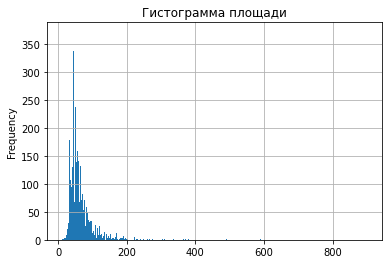

In [19]:
print(data['total_area'].describe())
print(data['total_area'].plot.hist(bins=len(data['total_area'].unique()), title='Гистограмма площади', grid=True))


Значения столбца цен оказались слишком большие для анализа и даже для отображения. Поэтому сначала отформатируем единицу измерения в столбце и перезапишем данные в тысячах рублей.  

count     14486.000000
mean       6838.615521
std       10187.144437
min          12.190000
25%        3571.250000
50%        4850.000000
75%        7000.000000
max      420000.000000
Name: last_price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


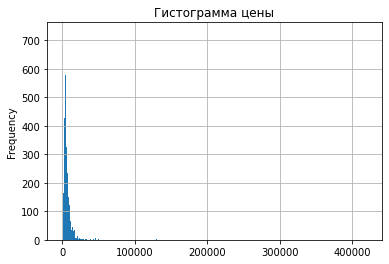

In [20]:
data['last_price'] = (data['last_price'] / 1000).round(2)
print(data['last_price'].describe())
print(data['last_price'].plot.hist(bins=len(data['last_price'].unique()), title='Гистограмма цены', grid=True))

count    14486.000000
mean         2.137857
std          1.099210
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


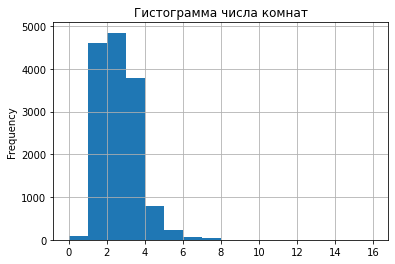

In [21]:
print(data['rooms'].describe())
print(data['rooms'].plot.hist(bins=len(data['rooms'].unique()), title='Гистограмма числа комнат', grid=True))

count    14486.000000
mean         2.728702
std          0.291856
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


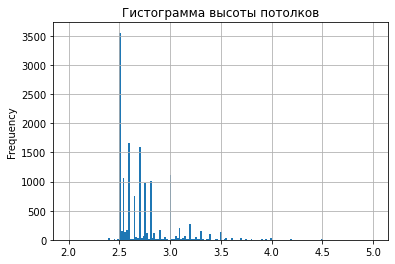

In [22]:
print(data['ceiling_height'].describe())
print(data['ceiling_height'].plot.hist(bins=len(data['ceiling_height'].unique()), range=(2, 5), title='Гистограмма высоты потолков', grid=True))

##### Вывод 1:

В целом, можно сказать, что распределение везде выглядит нормальным - есть явные пики в начале и плавный спад. По графикам и стандартному отклонению в описании видно, что в столбцах с ценами и площадью есть выбросы. В то время как, в столбцах с высотой потолков и количеством комнат данные распределены более-менее равномерно.

##### Вопрос 2:

Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. 
Сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

AxesSubplot(0.125,0.125;0.775x0.755)


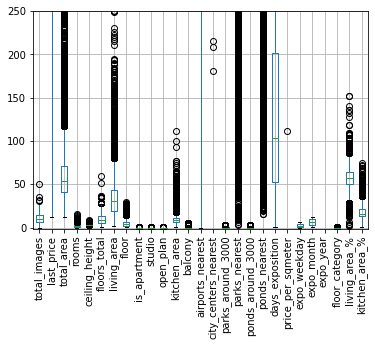

In [23]:
plt.ylim(-1, 250)
print(data.boxplot(figsize=(15, 8), rot=90)) #ничего не понятно, сделаем чуть крупнее

count    14486.000000
mean       175.716692
std        211.114460
min          1.000000
25%         53.000000
50%        103.000000
75%        202.000000
max       1580.000000
Name: days_exposition, dtype: float64
103.0
AxesSubplot(0.125,0.125;0.775x0.755)


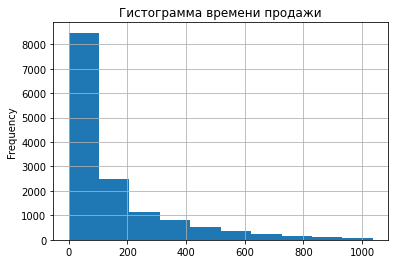

In [24]:
print(data['days_exposition'].describe())
print(data['days_exposition'].median())
print(data['days_exposition'].plot.hist(range=(0, len(data['days_exposition'].unique())), title='Гистограмма времени продажи', grid=True))

##### Вывод 2:

По полученным данным видно, что обычно продажа занимает от 17 до 202 дней. Очень быстрыми будут продажи, которые совершились за менее чем 17 дней. А слишком долгими - за более чем 202 дня. Здесь также стандартное отклонение слишком велико, что сигнализирует о наличии выбросов.

##### Вопрос 3:

Уберем редкие и выбивающиеся значения. 
Для удобства построим отдельный график для столбца цены (потому что данные в нем сильно отличаются от других столбцов)

AxesSubplot(0.125,0.125;0.775x0.755)


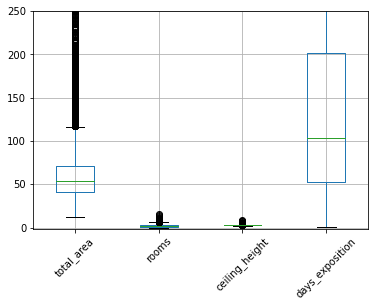

In [25]:
plt.ylim(-1, 250)
print(data.boxplot(column=['total_area', 'rooms', 'ceiling_height','days_exposition'],rot=45))

AxesSubplot(0.125,0.125;0.775x0.755)


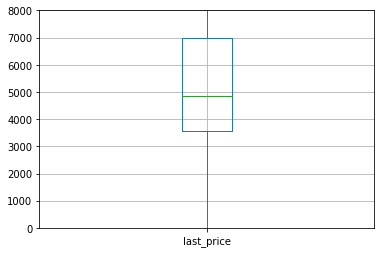

In [26]:
plt.ylim(-1, 8000)
print(data.boxplot(column='last_price'))

Избавимся от выбросов в каждом из этих столбцов методом составной фильтрации по срезам.

In [27]:
total_area_q1 = data['total_area'].quantile(0.25)  #Простите за этот ужас, перепробовала все, что могла - ничего не сработало. Пришлось пилить вручную.       
total_area_q3 = data['total_area'].quantile(0.75)
total_area_iqr = total_area_q3 - total_area_q1
rooms_q1 = data['rooms'].quantile(0.25)  
rooms_q3 = data['rooms'].quantile(0.75)
rooms_iqr = rooms_q3 - rooms_q1
ceiling_height_q1 = data['ceiling_height'].quantile(0.25)  
ceiling_height_q3 = data['ceiling_height'].quantile(0.75)
ceiling_height_iqr = ceiling_height_q3 - ceiling_height_q1
days_exposition_q1 = data['days_exposition'].quantile(0.25)  
days_exposition_q3 = data['days_exposition'].quantile(0.75)
days_exposition_iqr = days_exposition_q3 - days_exposition_q1
last_price_q1 = data['last_price'].quantile(0.25)  
last_price_q3 = data['last_price'].quantile(0.75)
last_price_iqr = last_price_q3 - last_price_q1
data_iqr = data.query("@total_area_q1 - 1.5*@total_area_iqr < total_area < @total_area_q3 + 1.5*@total_area_iqr " \
"& @rooms_q1 - 1.5*@rooms_iqr < rooms < @rooms_q3 + 1.5*@rooms_iqr " \
"& @ceiling_height_q1 - 1.5*@ceiling_height_iqr < ceiling_height < @ceiling_height_q3 + 1.5*@ceiling_height_iqr " \
"& @days_exposition_q1 - 1.5*@days_exposition_iqr < days_exposition < @days_exposition_q3 + 1.5*@days_exposition_iqr " \
"& @last_price_q1 - 1.5*@last_price_iqr < last_price < @last_price_q3 + 1.5*@last_price_iqr")
data_iqr.info() # в итоге у нас осталось 11656 объектов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11433 entries, 1 to 14485
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          11433 non-null  int64  
 1   last_price            11433 non-null  float64
 2   total_area            11433 non-null  float64
 3   first_day_exposition  11433 non-null  object 
 4   rooms                 11433 non-null  int64  
 5   ceiling_height        11433 non-null  float64
 6   floors_total          11433 non-null  int32  
 7   living_area           11433 non-null  float64
 8   floor                 11433 non-null  int64  
 9   is_apartment          11433 non-null  bool   
 10  studio                11433 non-null  bool   
 11  open_plan             11433 non-null  bool   
 12  kitchen_area          11433 non-null  float64
 13  balcony               11433 non-null  int32  
 14  locality_name         11433 non-null  object 
 15  airports_nearest   

##### Вывод 3:

В столбцах с количетсвом комнат и высотой потолков выбросов меньше, т.к. у данных показателей все же есть внешние ограничения, которые влияют на разброс данных.
В то время как столбцы с ценой и количеством дней продажи ограничений почти не имеют и показывают большой интерквартильный размах и большое количество выбросов.

##### Вопрос 4:

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

                      last_price  total_area     rooms  city_centers_nearest
last_price              1.000000    0.692419  0.430559             -0.198226
total_area              0.692419    1.000000  0.801710             -0.076868
rooms                   0.430559    0.801710  1.000000             -0.040804
city_centers_nearest   -0.198226   -0.076868 -0.040804              1.000000
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


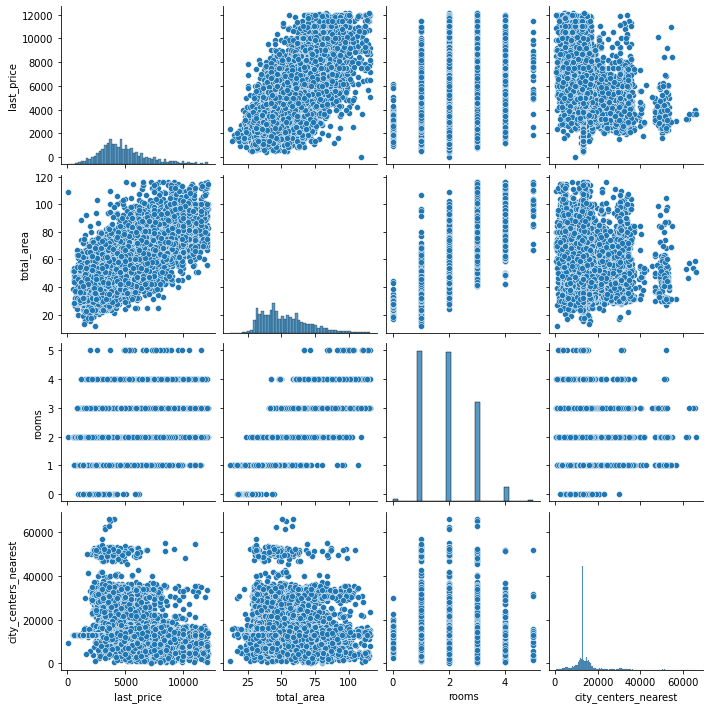

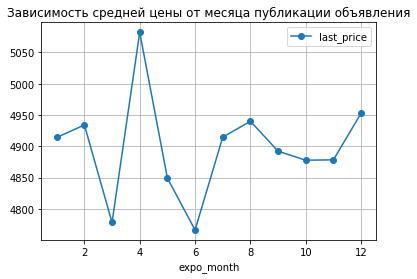

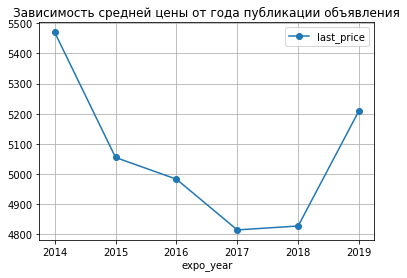

In [28]:
corr_data = data_iqr[['last_price', 'total_area', 'rooms', 'city_centers_nearest']]
print(corr_data.corr())
print(sns.pairplot(corr_data))
print(data_iqr.pivot_table(index='expo_month', values='last_price', aggfunc='mean').plot(style='o-', grid=True, title='Зависимость средней цены от месяца публикации объявления'))
print(data_iqr.pivot_table(index='expo_year', values='last_price', aggfunc='mean').plot(style='o-', grid=True, title='Зависимость средней цены от года публикации объявления'))

##### Вывод 4:

Больше всего цена зависит от общей площади и количества комнат. Влияние удаленности от центра в данной выборке очень мало, но все же показывает небольшую обратную взаимосвязь - чем меньше расстояние до центра, тем больше цена. Остальные показатели на цену не влияют. На графике распределения средних цен по месяцам есть пик на апреле и понижения цен в марте и мае. Сложно сделать какой-то логический вывод в данной ситуации. Предположим, что это особенность данной выборки. Явной закономерности на графиках распределения средней цены по месяцам и годам не обнаружено.

##### Вопрос 5:

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [29]:
locality_sorted_data = data_iqr.groupby('locality_name').agg({'floor': 'count', 'price_per_sqmeter': 'mean'}).sort_values(by='floor', ascending=False)
display(locality_sorted_data.head(10)) #10 населённых пунктов с наибольшим числом объявлений
display(locality_sorted_data.sort_values(by='price_per_sqmeter', ascending=False).head()) #населённые пункты с самой высокой стоимостью жилья
display(locality_sorted_data.sort_values(by='price_per_sqmeter', ascending=False).tail()) #населённые пункты с самой низкой стоимостью жилья

,floor,price_per_sqmeter
locality_name,,
Санкт-Петербург,7606,106416.117374
Всеволожск,237,67270.988059
посёлок Шушары,197,79812.381168
Колпино,186,75647.819785
Пушкин,182,100302.531923
посёлок Мурино,175,88079.777829
Гатчина,131,70291.157710
посёлок Парголово,129,90479.114186
Петергоф,118,84320.929915


,floor,price_per_sqmeter
locality_name,,
деревня Мистолово,3,107121.683333
Санкт-Петербург,7606,106416.117374
Кудрово,68,104432.660000
Зеленогорск,17,104144.450588
Сестрорецк,102,101263.542255


,floor,price_per_sqmeter
locality_name,,
поселок Почап,1,16037.74
деревня Фалилеево,1,13303.77
поселок городского типа Ефимовский,1,12686.57
поселок Совхозный,1,12555.56
деревня Вахнова Кара,1,11688.31


##### Вопрос 6:

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

<AxesSubplot:xlabel='city_centers_nearest_kilo'>

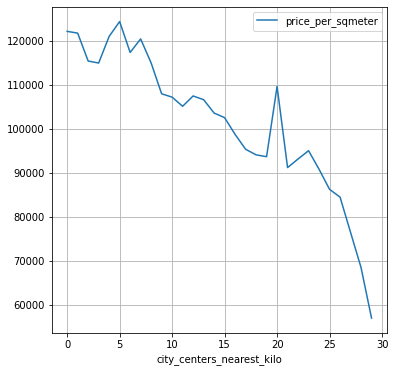

In [30]:
data_iqr['city_centers_nearest_kilo'] = (data_iqr['city_centers_nearest'] / 1000).astype('int')
spb_data = data_iqr.query('locality_name == "Санкт-Петербург"').groupby('city_centers_nearest_kilo').agg({'price_per_sqmeter': 'mean'})
spb_data.plot(figsize=(6,6), grid=True)



##### Вывод 6:

По графику видно, что примерно в районе 6-7 мн то центра идет резкий спад цены за кв. метр. Можно предположить, что это и есть граница центральной зоны.

##### Вопрос 7:

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

count    882.000000
mean      63.564909
std       20.878019
min       12.000000
25%       47.000000
50%       62.000000
75%       78.000000
max      115.100000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


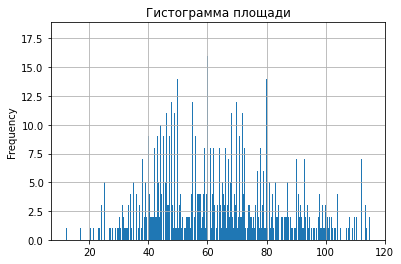

In [31]:
spb_center = data_iqr.query('locality_name == "Санкт-Петербург" & city_centers_nearest_kilo < 7')
print(spb_center['total_area'].describe())
print(spb_center['total_area'].plot.hist(bins=len(spb_center['total_area'].unique()), title='Гистограмма площади', grid=True))

count    882.000000
mean       2.272109
std        0.942558
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: rooms, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


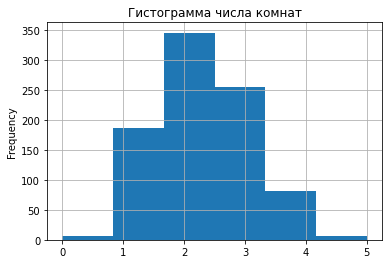

In [32]:
print(spb_center['rooms'].describe())
print(spb_center['rooms'].plot.hist(bins=len(spb_center['rooms'].unique()), title='Гистограмма числа комнат', grid=True))

count      882.000000
mean      7299.842642
std       2150.410769
min       1600.000000
25%       5701.250000
50%       7200.000000
75%       8743.812500
max      12100.000000
Name: last_price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


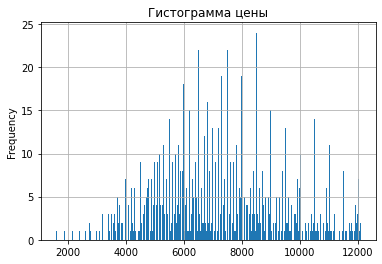

In [33]:
print(spb_center['last_price'].describe())
print(spb_center['last_price'].plot.hist(bins=len(spb_center['last_price'].unique()), title='Гистограмма цены', grid=True))

count    882.000000
mean       2.895374
std        0.208638
min        2.400000
25%        2.750000
50%        2.950000
75%        3.027500
max        3.210000
Name: ceiling_height, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


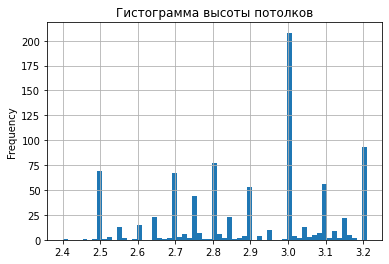

In [34]:
print(spb_center['ceiling_height'].describe())
print(spb_center['ceiling_height'].plot.hist(bins=len(spb_center['ceiling_height'].unique()), title='Гистограмма высоты потолков', grid=True))

rooms                   0.457120
city_centers_nearest   -0.188357
floor_category         -0.124219
expo_weekday           -0.033100
expo_month             -0.025816
expo_year               0.036526
dtype: float64


<AxesSubplot:xlabel='last_price', ylabel='rooms'>

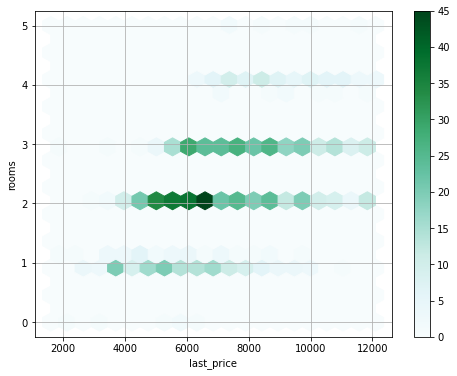

In [35]:
corr_data_spb = spb_center[['rooms', 'city_centers_nearest', 'floor_category', 'expo_weekday', 'expo_month', 'expo_year']]
print(corr_data_spb.corrwith(spb_center['last_price']))
spb_center.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

##### Вывод 7:

При анализе квартир в центре Петербурга (в радиусе 7 км) можно отметить нормальное распределение почти по всем параметрам, кроме высоты потолков. Тут явно выбивается показатель в 3 метра:) 
При подсчете корелляции данные не отличаются от общей картины до этого - примерно 0,4 кореляция с количеством комнат. С другими показателями взаимосвязи также не выявлено.

### Общий вывод

Мы проанализировали данные из объявлений о продаже кварир в Санкт-Петербурге и Ленинградской области. Для начала мы изучили данные на аномалии, пропуски, провели предобработку данных, поработали над типами данных и добавили еще несколько нужных столбцов. Затем мы проанализировали некоторые наиболее важные столбцы на распределение данных и избавились от выбросов, которые могли исказить итог. Мы выявили взаимосвязи между ценой и некоторыми показателями. А также проанализировали отдельно данные в центре Санкт-Петербурга и сравнили с общей картиной.
В ходе анализа мы выяснили, что из всех присутствующих показателей на цену вляют больше всего площадь и количество комнат. Такие показатели, как высота потолков или дата пубикации объявления на цену не вляют.
Это просеживается и при выделении отдельно сегмента квартир в центре Санкт-Петербурга. Единственным влияющим на цену фактором является количество комнат.
Близость к центру или этаж квартиры влияют в намного меньшей степени.
Таким образом, можно сказать, что рыночное ценообразование в основном строится на количестве комнат и площади квартиры.